# 04. Modeling without PCA
___


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV




___


Introduction


In this notebook, I will be building two types of classification models. Using Logistic Regression and Decision Trees, we will see if we can correctly classify our target variable and predict the classes of new datapoints. 
I will train each model with a portion of the dataset and then compare the outputs with my test set. 


___


In [2]:
heart22 = pd.read_csv('~/Desktop/capstone-project-Tasnimacj/data/cleaned_data/heart22_preprocessed.csv', index_col=0)

In [3]:
heart22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246012
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Female                         246013 non-null  int64  
 1   GeneralHealth                  246013 non-null  int64  
 2   PhysicalHealthDays             246013 non-null  float64
 3   MentalHealthDays               246013 non-null  float64
 4   LastCheckupTime                246013 non-null  int64  
 5   PhysicalActivities             246013 non-null  int64  
 6   SleepHours                     246013 non-null  float64
 7   RemovedTeeth                   246013 non-null  int64  
 8   HadHeartAttack                 246013 non-null  int64  
 9   HadAngina                      246013 non-null  int64  
 10  HadStroke                      246013 non-null  int64  
 11  HadAsthma                      246013 non-null  int64  
 12  HadSkinCancer                  2460

Here I load in the data that we saved from the previous notebook. Checking if our dataset is properly encoded, with 0 null values and has a correct index. Everything looks good, so we can move straight into modeling now.

In [4]:
y = heart22['HadAngina'] # Target Variable
X = heart22.drop('HadAngina', axis=1) 

In [5]:
print('Shape of y:', y.shape)
print('Shape of X:', X.shape)

Shape of y: (246013,)
Shape of X: (246013, 41)


Split our data into our feature columns and our target variable. We will be putting our X into our models and comparing the outputs with our y.


In [6]:
#1st split

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 196810 data points.
The test set has 49203 data points.


For the model, we need to split our data into a training set and a test set. Here I did a 80:20 split, keeping an even distribution of y variables in each split. 
We use the train set to fit the model and then evaluate on the test set. Splitting the datapoints helps prevent overfitting and a way to accurately check model performance. By having unseen data, we can come close to replicating real life scenarios that the model will face.

___

### 1 Baseline Logistic Regression


For my first model, I will attempt to create a model that has no hyperparameter optimization. This will be a a model we can use for comparison. I am expecting that this model will perform poorly and will be very good at predicting 0, or 'did not have angina'
As logistic regression takes L2 Regularisation as its default penalty, I will need to scale my data beforehand.

In [7]:
ss = StandardScaler().fit(X_rem)
X_rem_ss = ss.transform(X_rem)
X_test_ss = ss.transform(X_test)

In [8]:
baseline_log_reg = LogisticRegression(random_state=1)
baseline_log_reg.fit(X_rem_ss, y_rem)

LogisticRegression(random_state=1)

We instantiate the model and then fit the model on our y remainder data and the scaled X remainder data. We then input unknown data into the model and compare accuracy scores with our test data.

In [9]:
print(f'Accuracy on remainder set: {baseline_log_reg.score(X_rem_ss, y_rem)}')
print(f'Accuracy on test set: {baseline_log_reg.score(X_test_ss, y_test)}')

Accuracy on remainder set: 0.9450840912555256
Accuracy on test set: 0.9445359022823812


Our accuracy on the remainder and test set is the same, 94.5%. This means our model has correctly classified 94.5% of the data points in both sets. This shows that the model has a good fit, and can handle unseen data.

However, accuracy is not a good indicator of the model outcomes as it does not show if our model is behaving how we expect. 
We can look further by using a classification report and confusion matrix to see what datapoints were classified as.

In [207]:

y_test_pred = baseline_log_reg.predict(X_test_ss)


cmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat)

cmat_n = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred, normalize='all')*100,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat_n)


print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')


,predicted 0,predicted 1
true 0,45639,573
true 1,2156,835


,predicted 0,predicted 1
true 0,92.756539,1.164563
true 1,4.381847,1.697051


Recall score: 27.92%
Precision score: 59.30%
F1 score: 37.96%


In [192]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46212
           1       0.59      0.28      0.38      2991

    accuracy                           0.94     49203
   macro avg       0.77      0.63      0.68     49203
weighted avg       0.93      0.94      0.94     49203



In [208]:
# save the results 
baseline_logreg_recall = round(recall_score(y_test, y_test_pred)*100, 2)
baseline_logreg_precision = round(precision_score(y_test, y_test_pred)*100, 2)
baseline_logreg_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
baseline_logreg_accu = round(baseline_log_reg.score(X_test_ss, y_test)*100,2)

Even though our model was 94.5% accurate, it was only good at predicting 'Had no Angina'.  We can see in the confusion matrix, that it correctly predicted 93% of true 0s, but 2% of true 1s.

This is most likely due to the imbalance in our dataset. It has seen more cases where y would be '0' than when y would be '1'.


 My main goal is to get high recall without sacrificing precision and accuracy. For my problem, it would be better to have more false positives than false negatives. It would be worse to mischaracterise someone as not at risk than saying they could be at risk. My model could only classify 837 datapoints correcty as '1' out of 2991 '1' values.

In [193]:
y_proba_base = baseline_log_reg.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba_base > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%",'\n')


# higher cut-off (0.8)
y_threshold = np.where(y_proba > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%")


Threshold of 0.5:
Precision score: 6.08%
Recall score: 100.00% 

Threshold of 0.8:
Precision score: 6.12%
Recall score: 100.00%


For a medical diagnosis, we would want to be very sure about the predictions and would only want a confidence of 0.9 or higher. As I only want to create a early detection/risk flagging system, I will allow my model to have a confidence threshold of 0.8 for now. 

By doing this, we can see the recall has improved, but we have mislabelled a lot of the datapoints.

In [194]:
from sklearn.metrics import roc_curve, roc_auc_score 

fprs_base, tprs_base, thresholds_base = roc_curve(y_test, y_proba_base)
roc_auc_base = roc_auc_score(y_test, y_proba_base)


___

### 2 Tuning Logistic Regression

Pipeline

Using a pipeline, I want to find the best hyperparameters for my model. I set up a pipeline that contains a scaler and the model of our choice. 

In [13]:
from tempfile import mkdtemp
cachedir = mkdtemp()

In [14]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", LogisticRegression())], memory=cachedir)

Hyperparameter Optimisation

Setting up a parameter grid with what I would like to change in my model. I want to explore different c values, looking at if my model performs better with a big regularisation penalty (small c value) or with a small regularisation penalty (big c value). I also want to see what model penalty would be better. I need to scale my data, so I will be using a standard scaler.

In [15]:
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]

# Parameters
log_reg_param = [

    {'scaler': [ StandardScaler()],
     'model': [LogisticRegression(solver='saga',random_state=1, n_jobs=-1, max_iter=10000)], 
     'model__C': c_values,
     'model__penalty': ['l1', 'l2'],
    }
]

GridSearch

In [16]:
grid = GridSearchCV(estimator=pipe,param_grid=log_reg_param, cv=5,verbose=1,refit=True)

In [17]:
fittedgrid_lr = grid.fit(X_rem,y_rem)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [18]:
fittedgrid_lr.best_params_

{'model': LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                    random_state=1, solver='saga'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'scaler': StandardScaler()}

GridSearch looks at different parameter settings across 5 cross folds on our Remainder set. It does this to find the best model settings whilst preventing data leakage and overfitting on our train set. 
GridSearch has found that the best parameters for our Logistic Regression is having a C value of 0.01, which means we need a strong regularization strength. We need a L1 penalty in this model to help set coefficients to 0.

Model Interpretation 



In [73]:
coef_ = fittedgrid_lr.best_estimator_.named_steps["model"].coef_.flatten()

In [75]:
coef_df = pd.DataFrame({'Variable': X_rem.columns, 'Coefficients': coef_})

coef_df.sort_values(by='Coefficients', ascending=False, inplace=True)

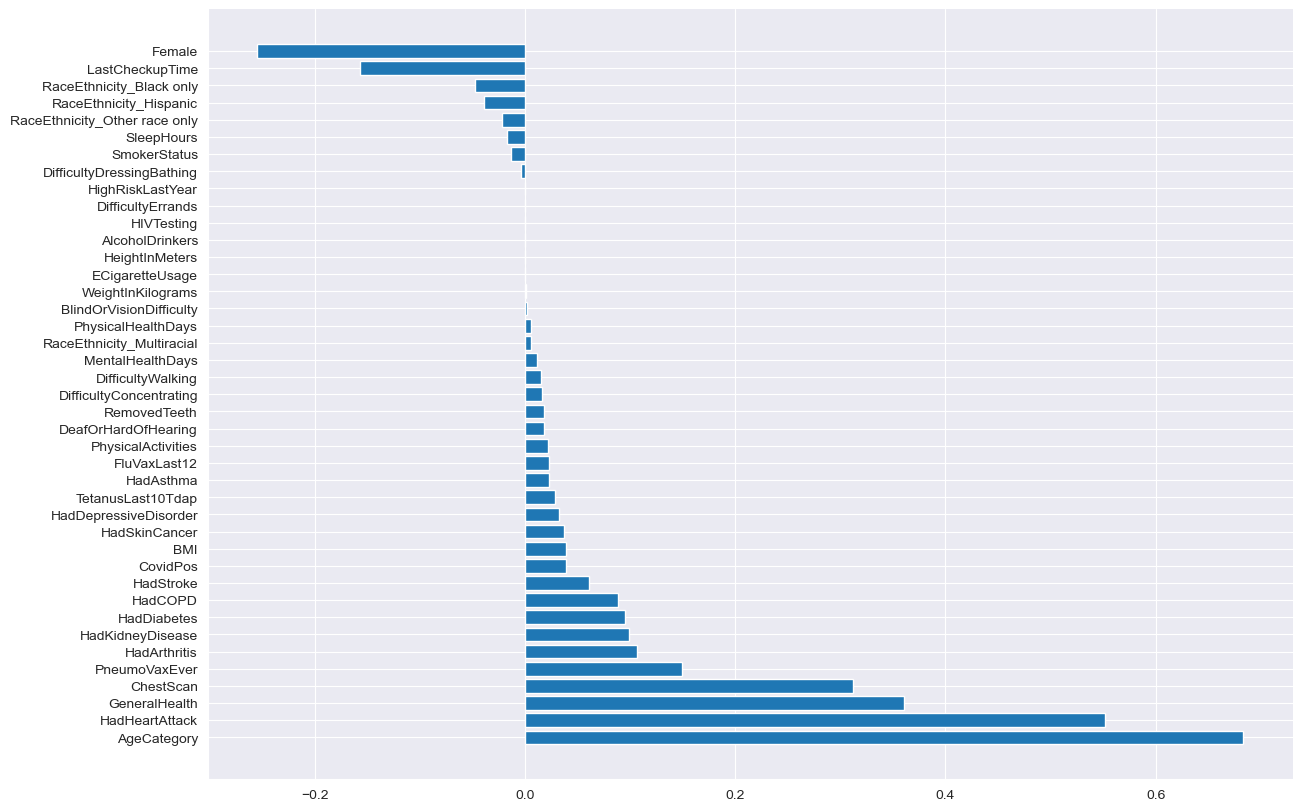

In [98]:

plt.figure(figsize=(14,10))

sns.set_style('darkgrid')

plt.barh(coef_df['Variable'], coef_df['Coefficients'])

sns.despine()



In [171]:
coef_df.head()

,Variable,Coefficients
26,AgeCategory,0.683477
8,HadHeartAttack,0.552071
1,GeneralHealth,0.360902
25,ChestScan,0.312123
33,PneumoVaxEver,0.149391


In [172]:
coef_df.loc[coef_df['Coefficients'] == 0]

,Variable,Coefficients
24,ECigaretteUsage,0.0
27,HeightInMeters,0.0
30,AlcoholDrinkers,0.0
31,HIVTesting,0.0
22,DifficultyErrands,0.0
35,HighRiskLastYear,0.0


The model is greatly impacted by a persons age when predicting whether they have Angina or not. Having a Heartattack also impacts the models, and increases the risk of developing Angina. There are several features that have 0 impact on the model, due to the L1 penalty. A persons biological sex can highly impact if you don't develop a cardiovascular disease, being female can decrease your risk. 


Model Evaluation

In [216]:
print(f"Best accuracy on the remainder set: {fittedgrid_lr.score(X_rem, y_rem)}")
print(f"Best accuracy on the test set: {fittedgrid_lr.score(X_test, y_test)}")

Best accuracy on the remainder set: 0.9450891722981556
Best accuracy on the test set: 0.9448001138141984


In [217]:
y_test_pred = fittedgrid_lr.predict(X_test)


conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'],
)
display(conmat)

cmat_n = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred, normalize='all'),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat_n)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

,predicted 0,predicted 1
true 0,45656,556
true 1,2160,831


,predicted 0,predicted 1
true 0,0.927911,0.011300
true 1,0.043900,0.016889


Recall score: 27.78%
Precision score: 59.91%
F1 score: 37.96%


In [219]:
# save the results 
best_lr_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_lr_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_lr_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_lr_accu = round(fittedgrid_lr.score(X_test, y_test)*100,2)

Our decided best logistic regression model is performing similar than our baseline in terms of recall and precision. There has not been much change in our scores. Perhaps for our next model iterations we can look into changing other hyperparameters such as looking into having no penalty or adding both penalty terms, or adding a class weight.


In [173]:
y_proba_lr = fittedgrid_lr.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold_lr = np.where(y_proba_lr > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold_lr)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold_lr)*100:0.2f}%",'\n')


# higher cut-off (0.8)
y_threshold_lr = np.where(y_proba_lr > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold_lr)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold_lr)*100:0.2f}%")


Threshold of 0.5:
Precision score: 59.91%
Recall score: 27.78% 

Threshold of 0.8:
Precision score: 77.01%
Recall score: 4.48%


In [175]:
fprs_lr, tprs_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

With this model our recall has dropped but our precision has increased if we move our probability threeshold.

___

### 3 Tuning Decision Tree

Pipeline

Setting up the pipeline for another classification model, this time I will use Decision Tree Classifier.

In [27]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("dt_model", DecisionTreeClassifier())], memory=cachedir)

Hyperparameter Optimisation

For the parameter grid, this time I want to see if scaling data would make a change in modeling. I will explore different options for the trees max_depth and min_samples_leaf. The max_depth parameter will limit the depth of a tree so by having none, we will have a tree that can keep expanding.


In [28]:

dt_param  = {"scaler":[StandardScaler(), None],
            "dt_model__max_depth": [None, 2, 4, 6, 8,10],
            "dt_model__min_samples_leaf": [2, 5, 10] }

In [29]:
grid = GridSearchCV(estimator=pipe,param_grid=dt_param, cv=5,verbose=1,refit=True)

In [30]:
fittedgrid_dt = grid.fit(X_rem,y_rem)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [31]:
fittedgrid_dt.best_params_

{'dt_model__max_depth': 6,
 'dt_model__min_samples_leaf': 10,
 'scaler': StandardScaler()}

The best optimization for our decision tree would be using a standard scaler, having a max_depth of 6 and 10 min_samples_leaf. Scaling my data beforehand seems to be a crucial step for modeling.

Model Interpretation

<Axes: >

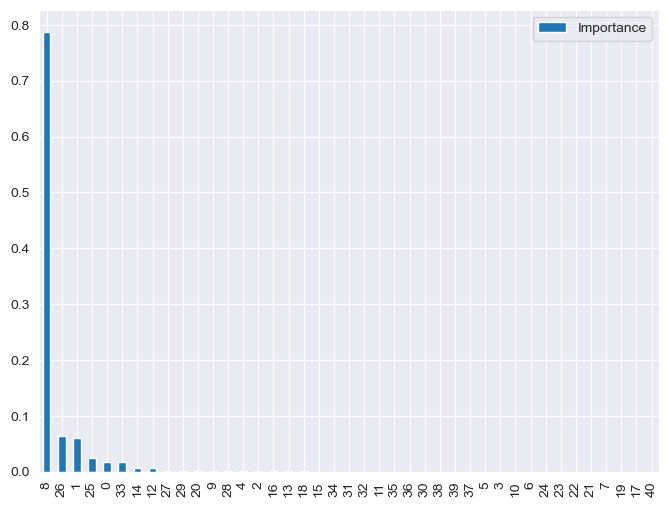

In [102]:
feat_importances = pd.DataFrame({'Feature': X_rem.columns, 'Importance': fittedgrid_dt.best_estimator_.named_steps["dt_model"].feature_importances_,})
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

feat_importances.plot(kind='bar', figsize=(8,6))

In [176]:
feat_importances.head()

,Feature,Importance
8,HadHeartAttack,0.787611
26,AgeCategory,0.063921
1,GeneralHealth,0.060643
25,ChestScan,0.025545
0,Female,0.017793


We can see that for our DecisionTree, the most important feature is whether someone had a Heart Attack.

Model Evaluation

In [32]:
print(f"Best accuracy on the remainder set: {fittedgrid_dt.score(X_rem, y_rem)}")
print(f"Best accuracy on the test set: {fittedgrid_dt.score(X_test, y_test)}")

Best accuracy on the remainder set: 0.9455820334332605
Best accuracy on the test set: 0.9447391419222405


Our accuracies are, again, similar to each other. We have no issue with over/underfitting. The accuracies being in the 90s shows that it is very confident in predicting classes correctly. 

In [145]:

y_test_pred = fittedgrid_dt.predict(X_test)


conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)
cmat_n = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred, normalize='all'),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat_n)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

,predicted 0,predicted 1
true 0,45593,619
true 1,2100,891


,predicted 0,predicted 1
true 0,0.92663,0.012581
true 1,0.04268,0.018109


Recall score: 29.79%
Precision score: 59.01%
F1 score: 39.59%


In [34]:
# save the results 
best_dt_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_dt_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_dt_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_dt_accu = round(fittedgrid_dt.score(X_test, y_test)*100,2)

Our recall score is 29.79%. This model is only a bit better at classifying '1's than our logistic regression models.
The precision is around 60%, so more than half of its '1' predictions were correct.   

ROC

In [177]:
y_proba_dt = fittedgrid_dt.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba_dt > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}",'\n')


# higher cut-off (0.8)
y_threshold = np.where(y_proba_dt > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")


Threshold of 0.5:
Precision score: 0.590066225165563
Recall score: 0.2978936810431294 

Threshold of 0.8:
Precision score: 0.0
Recall score: 0.0


We can see that this model had no predictions if we increased the threshold.

In [182]:

fprs_dt, tprs_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba)

___

### 4 SMOTE

As we saw in EDA, the actual proportion of 'HadAngina' in our target column was very small. To try and combat this we can sample our data, either using Upsampling, Downsampling or SMOTE. Here, I will be using SMOTE to create 'fake' data points by interpolating between datapoints. I hope to see model performances increase as they can learn better from having a more balanced dataset. 

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
X_rem_sm, y_rem_sm = SMOTE(random_state=1).fit_resample(X_rem, y_rem)

In [37]:
print('Original class distribution')
display(pd.Series(y_rem).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_rem_sm).value_counts().sort_index())

Original class distribution


HadAngina
0    184848
1     11962
Name: count, dtype: int64


Resampled class distribution


HadAngina
0    184848
1    184848
Name: count, dtype: int64

SMOTE has inflated our '1' distribution to now be equal with the number of '0's.

#### 4.1 LogReg

Repeating the previous steps again but this time fitting with our new balanced remainder set.

In [42]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", LogisticRegression())], memory=cachedir)
log_reg_param = [

    {'scaler': [ StandardScaler()],
     'model': [LogisticRegression(solver='saga',random_state=1, n_jobs=-1, max_iter=10000)], 
     'model__C': c_values,
     'model__penalty': ['l1', 'l2'],
    }
]

grid_sm = GridSearchCV(estimator=pipe,param_grid=log_reg_param, cv=5,verbose=1,refit=True)

In [43]:
fittedgrid_lr_sm = grid_sm.fit(X_rem_sm,y_rem_sm)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [44]:
fittedgrid_lr_sm.best_params_

{'model': LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                    random_state=1, solver='saga'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'scaler': StandardScaler()}

The gridsearch has chosen the same parameters as our other logistic regression model.

Model Interpretation

In [107]:
coef_sm = fittedgrid_lr_sm.best_estimator_.named_steps["model"].coef_.flatten()

In [108]:
coef_sm_df = pd.DataFrame({'Variable': X_rem.columns, 'Coefficients': coef_sm})

coef_sm_df.sort_values(by='Coefficients', ascending=False, inplace=True)


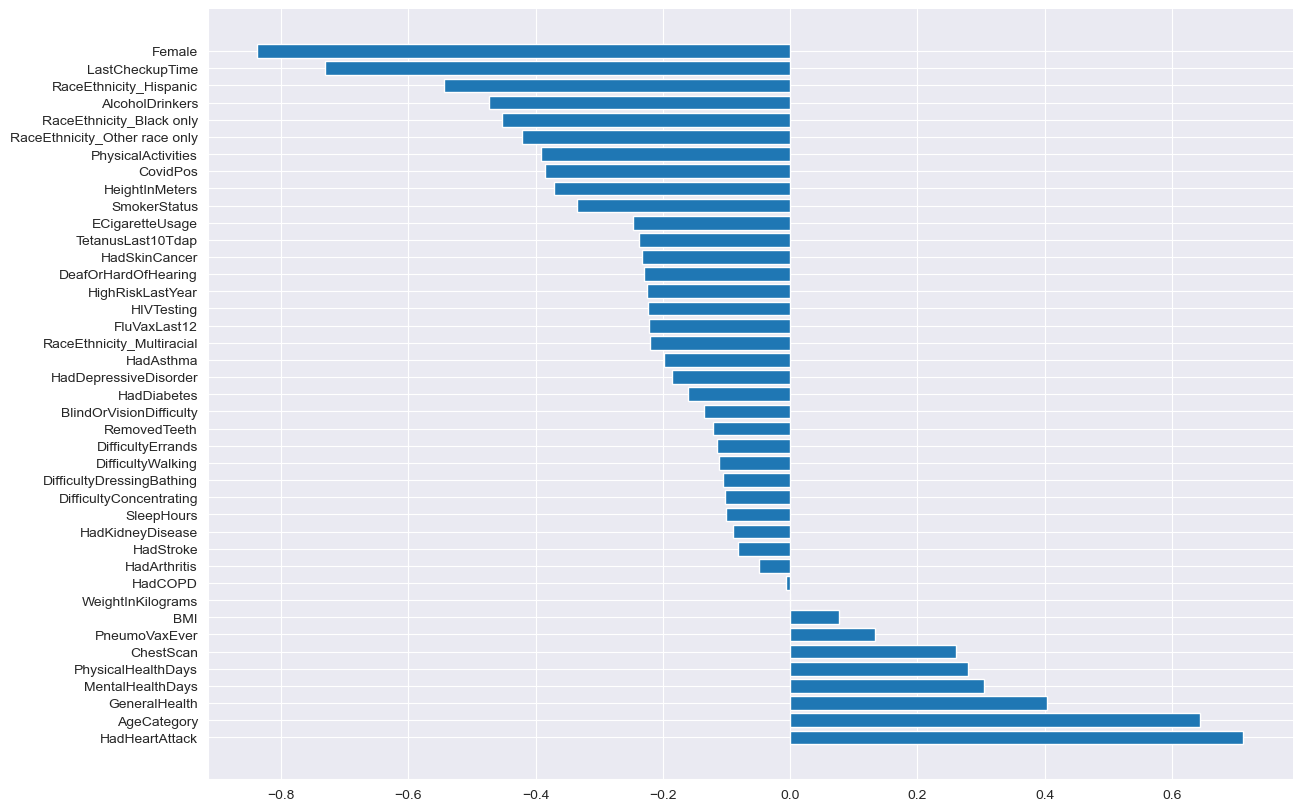

In [112]:
plt.figure(figsize=(14,10))

plt.barh(coef_sm_df['Variable'], coef_sm_df['Coefficients'])

sns.despine()


In [113]:
coef_sm_df.head()

,Variable,Coefficients
8,HadHeartAttack,0.712003
26,AgeCategory,0.643284
1,GeneralHealth,0.403249
3,MentalHealthDays,0.304694
2,PhysicalHealthDays,0.279000


For this model, HadHeartAttack is the coefficient with the most impact in predicting heart disease. We can see that if you are female, your risk of developing Angina is lowered but this time it has a stronger negative coefficient.

Model Evaluation 

In [146]:

print(f"Best accuracy on the remainder set: {fittedgrid_lr_sm.score(X_rem_sm, y_rem_sm)}")
print(f"Best accuracy on the test set: {fittedgrid_lr_sm.score(X_test, y_test)}")


y_test_pred = fittedgrid_lr_sm.predict(X_test)

conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

cmat_n = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred, normalize='all'),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat_n)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

Best accuracy on the remainder set: 0.8445209036613867
Best accuracy on the test set: 0.8155600268276325


,predicted 0,predicted 1
true 0,38403,7809
true 1,1266,1725


,predicted 0,predicted 1
true 0,0.780501,0.158710
true 1,0.025730,0.035059


Recall score: 57.67%
Precision score: 18.09%
F1 score: 27.54%


In [47]:
# save the results 
best_lr_sm_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_lr_sm_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_lr_sm_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_lr_sm_accu = round(fittedgrid_lr_sm.score(X_test, y_test)*100,2)

Although the accuracy has dropped, I can see an increase in our recall. The model became more familiar with cases that are classed as '1'  and can recognise it. However, our precision has fallen quite a bit, which shows that the model is not  predicting correctly. I can try to investigate further and make more changes to find a model with a better recall score.

In [183]:
y_proba_lr_sm = fittedgrid_lr_sm.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba_lr_sm > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%",'\n')


# higher cut-off (0.8)
y_threshold = np.where(y_proba_lr_sm > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%")

Threshold of 0.5:
Precision score: 18.09%
Recall score: 57.67% 

Threshold of 0.8:
Precision score: 29.83%
Recall score: 31.36%


We can see that if we increase our threshold, our precision increases slightly but our recall goes down.

In [185]:
fprs_lr_sm, tprs_lr_sm, thresholds_lr_sm = roc_curve(y_test, y_proba_lr_sm)
roc_auc_lr_sm = roc_auc_score(y_test, y_proba_lr_sm)


#### 4.2 DT

Fitting a decision tree with our balanced data.

In [48]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("dt_model", DecisionTreeClassifier())], memory=cachedir)

dt_param  = {"scaler":[StandardScaler(), None],
            "dt_model__max_depth": [None, 2, 4, 6, 8,10],
            "dt_model__min_samples_leaf": [2, 5, 10] }


grid_sm = GridSearchCV(estimator=pipe,param_grid=dt_param, cv=5,verbose=1,refit=True)

In [49]:
fittedgrid_dt_sm = grid_sm.fit(X_rem_sm,y_rem_sm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [50]:
fittedgrid_dt_sm.best_params_

{'dt_model__max_depth': None, 'dt_model__min_samples_leaf': 2, 'scaler': None}

For this decision tree model, our data does not need to be scaled. We have no max depth but min sample leaf is set to 2.

Model Interpretation

<Axes: >

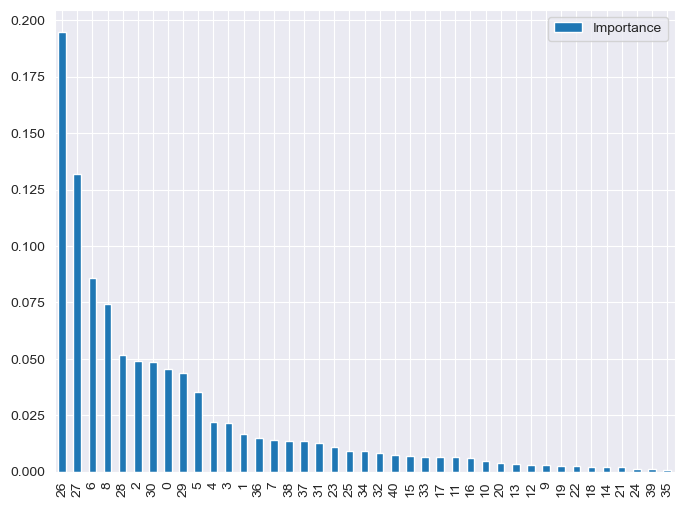

In [ ]:

feat_sm_importances = pd.DataFrame({'Feature': X_rem_sm.columns, 'Importance': fittedgrid_dt_sm.best_estimator_.named_steps["dt_model"].feature_importances_,})
feat_sm_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_sm_importances.plot(kind='bar', figsize=(8,6))

In [199]:
feat_sm_importances.head()

,Feature,Importance
26,AgeCategory,0.194846
27,HeightInMeters,0.131698
6,SleepHours,0.085791
8,HadHeartAttack,0.074306
28,WeightInKilograms,0.051775


We can see that for our DecisionTree, the most important feature is what AgeCategory a person falls into.

Model Evaluation  

In [147]:
print(f"Best accuracy on the remainder set: {fittedgrid_dt_sm.score(X_rem_sm, y_rem_sm)}")
print(f"Best accuracy on the test set: {fittedgrid_dt_sm.score(X_test, y_test)}")


y_test_pred = fittedgrid_dt_sm.predict(X_test)


conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

cmat_n = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred, normalize='all'),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1'])
    
display(cmat_n)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

Best accuracy on the remainder set: 0.9844331558902449
Best accuracy on the test set: 0.8894376359165092


,predicted 0,predicted 1
true 0,42801,3411
true 1,2029,962


,predicted 0,predicted 1
true 0,0.869886,0.069325
true 1,0.041237,0.019552


Recall score: 32.16%
Precision score: 22.00%
F1 score: 26.13%


In [55]:
# save the results 
best_dt_sm_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_dt_sm_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_dt_sm_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_dt_sm_accu = round(fittedgrid_dt_sm.score(X_test, y_test)*100,2)

Theres a slight difference in our train and test accuracies, indicating that the model has overfitted to the train data. This is a problem, if I were to use new unseen data, the model would not be able to perform well as it has fitted to a specfic case.

There is an increase in our recall score compared to our previous decision tree model. So we can see that SMOTE does help with prediction.

But our precision score has dropped again. With SMOTE, we can see that it does improve our recall scores as it gives the model more datapoints to learn from but it does sacrifice our precision.

ROC

In [200]:
y_proba_dt_sm = fittedgrid_dt_sm.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba_dt_sm > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%",'\n')


# higher cut-off (0.8)
y_threshold = np.where(y_proba_dt_sm > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold)*100:0.2f}%")
print(f"Recall score: {recall_score(y_test, y_threshold)*100:0.2f}%")


Threshold of 0.5:
Precision score: 22.00%
Recall score: 32.16% 

Threshold of 0.8:
Precision score: 22.80%
Recall score: 30.29%


Increasing the probability threshold did not make a big change to the models predictions.

In [201]:
fprs_dt_sm, tprs_dt_sm, thresholds_dt_sm = roc_curve(y_test, y_proba_dt_sm)
roc_auc_dt_sm = roc_auc_score(y_test, y_proba_dt_sm)

___


Conclusion

In [220]:
data = {'F1 score' :[baseline_logreg_f1,best_lr_f1,best_dt_f1,best_lr_sm_f1,best_dt_sm_f1],
     'Recall score':[baseline_logreg_recall,best_lr_recall,best_dt_recall,best_lr_sm_recall,best_dt_sm_recall], 
     'Precision score':[baseline_logreg_precision,best_lr_precision,best_dt_precision,best_lr_sm_precision,best_dt_sm_precision],
      'Accuracy':[baseline_logreg_accu,best_lr_accu,best_dt_accu,best_lr_sm_accu,best_dt_sm_accu]}


scores = pd.DataFrame(
    data = data,
    index = ['Basline LogReg', 'Best LogReg', 'Best DT','Best SMOTE LogReg', 'Best SMOTE DT' ],
    columns = ['F1 score','Recall score', 'Precision score', 'Accuracy']
)

Here is a table that compares the F1, Recall, Precision and Test Accuracy for each model.

In [221]:
scores

,F1 score,Recall score,Precision score,Accuracy
Basline LogReg,37.96,27.92,59.30,94.45
Best LogReg,37.96,27.78,59.91,94.48
Best DT,39.59,29.79,59.01,94.47
Best SMOTE LogReg,27.54,57.67,18.09,81.56
Best SMOTE DT,26.13,32.16,22.00,88.94


Before sampling, my best model would have been my baseline Logistic Regression model. After sampling, I found that my recall improves, which is what I ultimately want. In future notebooks, I will be looking at modelling with PCA, and also trying out ensemble learning with RandomForestClassifier models. 
I will have to look into different combinations for my model that would give me a good recall score but also not affect the precision as much.


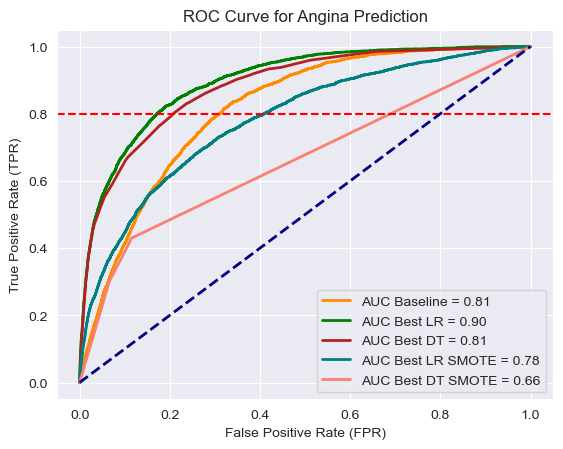

Area under curve (AUC) Baseline:0.8144726093801182
Area under curve (AUC) Best LogReg:0.8967212595980619
Area under curve (AUC) Best DT:0.8144726093801182
Area under curve (AUC) Best LR SMOTE:0.7819396112107927
Area under curve (AUC) Best DT SMOTE:0.6604517453222357



In [222]:
plt.figure()

plt.plot(fprs_base, tprs_base, color='darkorange',
         lw=2, label='AUC Baseline = %0.2f' % roc_auc_base)
plt.plot(fprs_lr, tprs_lr, color='green',
         lw=2, label='AUC Best LR = %0.2f' % roc_auc_lr)
plt.plot(fprs_dt, tprs_dt, color='firebrick',
         lw=2, label='AUC Best DT = %0.2f' % roc_auc_dt)
plt.plot(fprs_lr_sm, tprs_lr_sm, color='teal',
         lw=2, label='AUC Best LR SMOTE = %0.2f' % roc_auc_lr_sm)
plt.plot(fprs_dt_sm, tprs_dt_sm, color='salmon',
         lw=2, label='AUC Best DT SMOTE = %0.2f' % roc_auc_dt_sm)

plt.axhline(0.8, c='red', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Angina Prediction')
plt.legend(loc="best")
plt.show()


print(f'Area under curve (AUC) Baseline:{roc_auc_base}')
print(f'Area under curve (AUC) Best LogReg:{roc_auc_lr}')
print(f'Area under curve (AUC) Best DT:{roc_auc_dt}')
print(f'Area under curve (AUC) Best LR SMOTE:{roc_auc_lr_sm}')
print(f'Area under curve (AUC) Best DT SMOTE:{roc_auc_dt_sm}')
print()

## Code block sourced from Brainstation Model Evaluation notebook

For each model we were changing our models probabilty threshold, this was to reduce the rate of false positives but this also decreases the recall of true positives. By plotting a ROC curve, we can compare the true positive and false positive rates of our model.
If we wanted a true positive rate of 0.8 (indicated by the red dashed line), we can see what false positive rate we would have to take into consideration.

We can see that for the two SMOTE models, the false positive rate increases if we want a high true positive rate. 

Our best model so far would be the Logistic Regression model after our gridsearch, as it has an Area under curve of 0.9.